In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


SyntaxError: invalid syntax (3886918876.py, line 6)

In [4]:
import numpy as np

def im2col(image, kernel_size, stride=1, padding=0):
    # Image dimensions
    n_channels, img_h, img_w = image.shape
    
    # Kernel size
    k_h, k_w = kernel_size
    
    # Calculate output dimensions
    out_h = (img_h + 2 * padding - k_h) // stride + 1
    out_w = (img_w + 2 * padding - k_w) // stride + 1
    
    # Add padding to the image
    if padding > 0:
        image = np.pad(image, ((0, 0), (padding, padding), (padding, padding)), mode='constant')
    
    # Prepare the output matrix (im2col result)
    col = np.zeros((n_channels * k_h * k_w, out_h * out_w))
    
    # Create im2col matrix by extracting patches
    col_idx = 0
    for y in range(0, out_h * stride, stride):
        for x in range(0, out_w * stride, stride):
            # Extract the patch for each channel
            patch = image[:, y:y+k_h, x:x+k_w]
            col[:, col_idx] = patch.flatten()
            col_idx += 1
    
    return col

def conv2d_im2col(image, kernel, stride=1, padding=0):
    """
    Perform a 2D convolution using im2col.
    
    :param image: Input image (shape: [channels, height, width])
    :param kernel: Convolution filter (shape: [out_channels, in_channels, kernel_height, kernel_width])
    :param stride: Stride of the convolution
    :param padding: Amount of zero padding around the image
    :return: Output after convolution (shape: [out_channels, out_height, out_width])
    """
    # Image dimensions
    n_channels, img_h, img_w = image.shape
    
    # Kernel dimensions
    out_channels, in_channels, k_h, k_w = kernel.shape
    
    # Ensure the number of channels in the image matches the kernel
    assert n_channels == in_channels, "Number of channels in image and kernel must match."
    
    # Calculate output dimensions
    out_h = (img_h + 2 * padding - k_h) // stride + 1
    out_w = (img_w + 2 * padding - k_w) // stride + 1
    
    # Convert the input image to column form
    im_col = im2col(image, (k_h, k_w), stride, padding)
    
    # Reshape the kernel into 2D matrix form for multiplication
    kernel_col = kernel.reshape(out_channels, -1)
    
    # Perform matrix multiplication
    output_col = np.dot(kernel_col, im_col)
    
    # Reshape the output to match the desired output dimensions
    output = output_col.reshape(out_channels, out_h, out_w)
    
    return output
np.random.seed(3)

# Example usage
# image = np.random.randn(3, 5, 5)  # Random 3-channel (e.g., RGB) 5x5 image
# kernel = np.random.randn(3, 3, 3, 3)  # Random 2 filters with 3x3 kernel for 3 channels

# output = conv2d_im2col(image, kernel, stride=1, padding=1)
# print("Output shape:", output.shape)  # Output should have shape (3, 5, 5)



Output shape: (3, 5, 5)


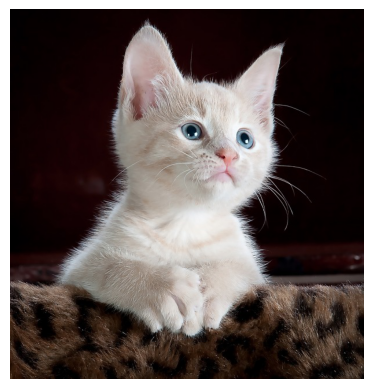

Image shape: (640, 612, 3)
(3, 640, 612)
(3, 3, 3, 3)


In [41]:
image_path = 'cat.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert the image to a NumPy array
image_np = np.array(image)

# Display the image using matplotlib
plt.imshow(image_np)
plt.axis('off')  # Hide the axes for better viewing
plt.show()

# Optionally, you can print the shape of the NumPy array
print("Image shape:", image_np.shape)
ch = image_np.shape[2]
nh = image_np.shape[0]
nw = image_np.shape[1]
img = image_np.transpose(2, 0, 1)
kernel = np.array([[[[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]] , [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]], [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]]],
                  [[[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]] , [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]], [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]]],
                  [[[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]] , [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]], [[0.08, 0.08, 0.08], [0.08, 0.92, 0.08], [0.08, 0.08, 0.08]]]]
                 )
kern = kernel.transpose(3,0,1,2)


print(img.shape)
print(kern.shape)



In [42]:
edges = conv2d_im2col(img, kern, stride=1, padding=0)
print(edges.shape)
edge_cat = edges.transpose(1,2,0)
print(edge_cat.shape)

(3, 638, 610)
(638, 610, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


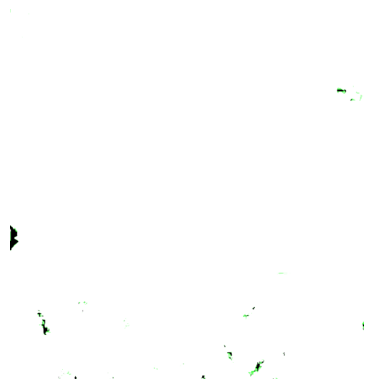

In [43]:
plt.imshow(edge_cat)
plt.axis('off')  # Hide the axes for better viewing
plt.show()